#### df sää 

In [13]:
import pandas as pd

In [14]:
# HUOM asema on melko kaukana
df = pd.read_csv("Lappeenranta Lepola 5.3.2024 - 22.4.2024_598ead37-1d34-430d-8e11-d90c97dac703.csv")

In [15]:
df.head(5)

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Tunnin sademäärä [mm],Ilmanpaineen keskiarvo [hPa],Kovin puuska [m/s],Tuulen suunnan keskiarvo [°],Kovin keskituulen nopeus [m/s],Suhteellisen kosteuden keskiarvo [%],Alin lämpötila [°C],Ylin lämpötila [°C],Keskituulen nopeus [m/s],Lämpötilan keskiarvo [°C]
0,Lappeenranta Lepola,2024,3,5,00:00,0.0,1031.8,-,-,-,87,-2.0,-1.6,-,-1.8
1,Lappeenranta Lepola,2024,3,5,01:00,0.0,1032.1,-,-,-,85,-2.1,-1.9,-,-2.0
2,Lappeenranta Lepola,2024,3,5,02:00,0.0,1032.3,-,-,-,83,-2.5,-2.0,-,-2.3
3,Lappeenranta Lepola,2024,3,5,03:00,0.0,1032.6,-,-,-,86,-3.2,-2.5,-,-2.9
4,Lappeenranta Lepola,2024,3,5,04:00,0.0,1032.8,-,-,-,88,-3.7,-3.2,-,-3.5


In [18]:
# Tarkastetaan puuttuvat sarakkeet
print(df["Kovin puuska [m/s]"].value_counts())
print(df["Tuulen suunnan keskiarvo [°]"].value_counts())
print(df["Kovin keskituulen nopeus [m/s]"].value_counts())
print(df["Keskituulen nopeus [m/s]"].value_counts())


Kovin puuska [m/s]
-    1165
Name: count, dtype: int64
Tuulen suunnan keskiarvo [°]
-    1165
Name: count, dtype: int64
Kovin keskituulen nopeus [m/s]
-    1165
Name: count, dtype: int64
Keskituulen nopeus [m/s]
-    1165
Name: count, dtype: int64


In [19]:
df = df.drop(columns=["Kovin puuska [m/s]", "Tuulen suunnan keskiarvo [°]", "Kovin keskituulen nopeus [m/s]", "Keskituulen nopeus [m/s]"])
df.head(5)

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Tunnin sademäärä [mm],Ilmanpaineen keskiarvo [hPa],Suhteellisen kosteuden keskiarvo [%],Alin lämpötila [°C],Ylin lämpötila [°C],Lämpötilan keskiarvo [°C]
0,Lappeenranta Lepola,2024,3,5,00:00,0.0,1031.8,87,-2.0,-1.6,-1.8
1,Lappeenranta Lepola,2024,3,5,01:00,0.0,1032.1,85,-2.1,-1.9,-2.0
2,Lappeenranta Lepola,2024,3,5,02:00,0.0,1032.3,83,-2.5,-2.0,-2.3
3,Lappeenranta Lepola,2024,3,5,03:00,0.0,1032.6,86,-3.2,-2.5,-2.9
4,Lappeenranta Lepola,2024,3,5,04:00,0.0,1032.8,88,-3.7,-3.2,-3.5


In [20]:
import numpy as np
# Muunetaan "-" NaN arvoksi
df = df.replace('-',np.NaN)
df["Date"] = df["Vuosi"].astype(str) + "-" + df["Kuukausi"].astype(str) + "-" +  df["Päivä"].astype(str) + " " + df["Aika [UTC]"]
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Havaintoasema                                   object
Vuosi                                            int64
Kuukausi                                         int64
Päivä                                            int64
Aika [UTC]                                      object
Tunnin sademäärä [mm]                          float64
Ilmanpaineen keskiarvo [hPa]                   float64
Suhteellisen kosteuden keskiarvo [%]             int64
Alin lämpötila [°C]                            float64
Ylin lämpötila [°C]                            float64
Lämpötilan keskiarvo [°C]                      float64
Date                                    datetime64[ns]
dtype: object

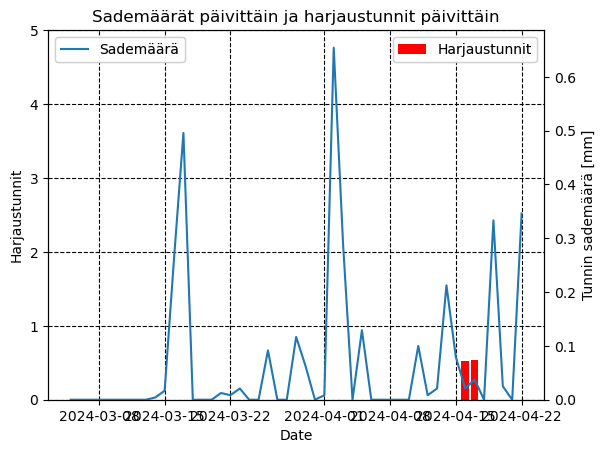

In [21]:
"""
Harjauspäivät
2024-04-16    0.530278
2024-04-17    0.537778
"""


dates = ['2024-04-16', '2024-04-17']
values = [0.530278, 0.537778]
brushing_days = pd.Series(values, index=pd.to_datetime(dates))
import matplotlib.pyplot as plt





# plt.plot(df["Date"], df["Tunnin sademäärä [mm]"])


df2 = df[["Date", "Tunnin sademäärä [mm]"]].set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(brushing_days.index, brushing_days.values, label="Harjaustunnit", color="red")
ax2.plot(df2, label="Sademäärä")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Tunnin sademäärä [mm]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Sademäärät päivittäin ja harjaustunnit päivittäin")
ax1.set_xlabel("Date")
ax1.set_ylim(top=5)
ax2.set_ylim(0,)
plt.show()